In [2]:
import os

# Set up the path to the data.
data_path = '/vol/bitbucket/az620/radiotherapy/data'

if os.path.exists(data_path):
    print("The path exists.")
    print('The relevant contents are...')
    for x in sorted(os.listdir(data_path)): 
        if 'nnUNet' in x: print(f'   {x}')
else:
    print("The path does not exist.")

# Each anatomical structure has a unique identifier.
id_anorectum = 'Dataset001_Anorectum'
id_bladder = 'Dataset002_Bladder'
id_ctvn = 'Dataset003_CTVn'
id_ctvp = 'Dataset004_CTVp'
id_parametrium = 'Dataset005_Parametrium'

import json

file_path = os.path.join(data_path, 'nnUNet_raw', id_anorectum, 'dataset.json')

with open(file_path, 'r') as file:
    data = json.load(file)

data

The path exists.
The relevant contents are...
   nnUNet_preprocessed
   nnUNet_raw
   nnUNet_results


{'channel_names': {'0': 'CT'},
 'labels': {'background': 0, 'anorectum': 1},
 'numTraining': 100,
 'file_ending': '.nii.gz',
 'overwrite_image_reader_writer': 'SimpleITKIO'}

In [3]:
import os

for x in sorted(os.listdir(os.path.join(data_path, 'nnUNet_raw', id_bladder, 'labelsTr'))):
    print(x, end=', ')

zzAMLART_001.nii.gz, zzAMLART_002.nii.gz, zzAMLART_003.nii.gz, zzAMLART_004.nii.gz, zzAMLART_005.nii.gz, zzAMLART_006.nii.gz, zzAMLART_007.nii.gz, zzAMLART_008.nii.gz, zzAMLART_009.nii.gz, zzAMLART_010.nii.gz, zzAMLART_011.nii.gz, zzAMLART_012.nii.gz, zzAMLART_013.nii.gz, zzAMLART_014.nii.gz, zzAMLART_015.nii.gz, zzAMLART_016.nii.gz, zzAMLART_017.nii.gz, zzAMLART_018.nii.gz, zzAMLART_019.nii.gz, zzAMLART_020.nii.gz, zzAMLART_021.nii.gz, zzAMLART_022.nii.gz, zzAMLART_023.nii.gz, zzAMLART_024.nii.gz, zzAMLART_025.nii.gz, zzAMLART_026.nii.gz, zzAMLART_027.nii.gz, zzAMLART_028.nii.gz, zzAMLART_029.nii.gz, zzAMLART_030.nii.gz, zzAMLART_031.nii.gz, zzAMLART_032.nii.gz, zzAMLART_033.nii.gz, zzAMLART_034.nii.gz, zzAMLART_035.nii.gz, zzAMLART_036.nii.gz, zzAMLART_037.nii.gz, zzAMLART_038.nii.gz, zzAMLART_039.nii.gz, zzAMLART_040.nii.gz, zzAMLART_041.nii.gz, zzAMLART_042.nii.gz, zzAMLART_043.nii.gz, zzAMLART_044.nii.gz, zzAMLART_045.nii.gz, zzAMLART_046.nii.gz, zzAMLART_047.nii.gz, zzAMLART_048.

In [4]:
import os

for x in sorted(os.listdir('bladder_segmentations')):
    print(x, end=', ')

bladder_001_1.nii.gz, bladder_002_1.nii.gz, bladder_003_1.nii.gz, bladder_004_1.nii.gz, bladder_005_1.nii.gz, bladder_006_1.nii.gz, bladder_007_1.nii.gz, bladder_008_1.nii.gz, bladder_009_1.nii.gz, bladder_010_1.nii.gz, bladder_011_1.nii.gz, bladder_012_1.nii.gz, bladder_013_1.nii.gz, bladder_014_1.nii.gz, bladder_015_1.nii.gz, bladder_016_1.nii.gz, bladder_017_1.nii.gz, bladder_018_1.nii.gz, bladder_019_1.nii.gz, bladder_020_1.nii.gz, bladder_021_1.nii.gz, bladder_022_1.nii.gz, bladder_023_1.nii.gz, bladder_024_1.nii.gz, bladder_025_1.nii.gz, bladder_026_1.nii.gz, bladder_027_1.nii.gz, bladder_028_1.nii.gz, bladder_029_1.nii.gz, bladder_030_1.nii.gz, bladder_031_1.nii.gz, bladder_032_1.nii.gz, bladder_033_1.nii.gz, bladder_034_1.nii.gz, bladder_035_1.nii.gz, bladder_036_1.nii.gz, bladder_037_1.nii.gz, bladder_038_1.nii.gz, bladder_039_1.nii.gz, bladder_040_1.nii.gz, bladder_041_1.nii.gz, bladder_042_1.nii.gz, bladder_043_1.nii.gz, bladder_044_1.nii.gz, bladder_045_1.nii.gz, bladder_04

In [5]:
import SimpleITK as sitk
import numpy as np

overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()

y_path = os.path.join(data_path, 'nnUNet_raw', id_bladder, 'labelsTr')
ypred_path = 'bladder_segmentations'

dice = []
jaccard = []
volume_similarity = []

for ypred, y in zip(sorted(os.listdir(ypred_path)), sorted(os.listdir(y_path))):
    print(y, ypred)

    y_img_sitk = sitk.ReadImage(os.path.join(y_path, y))
    ypred_img_sitk = sitk.ReadImage(os.path.join(ypred_path, ypred))

    overlap_measures_filter.Execute(y_img_sitk, ypred_img_sitk)

    dice.append(overlap_measures_filter.GetDiceCoefficient())
    jaccard.append(overlap_measures_filter.GetJaccardCoefficient())
    volume_similarity.append(overlap_measures_filter.GetVolumeSimilarity())
    

zzAMLART_001.nii.gz bladder_001_1.nii.gz


zzAMLART_002.nii.gz bladder_002_1.nii.gz
zzAMLART_003.nii.gz bladder_003_1.nii.gz
zzAMLART_004.nii.gz bladder_004_1.nii.gz
zzAMLART_005.nii.gz bladder_005_1.nii.gz
zzAMLART_006.nii.gz bladder_006_1.nii.gz
zzAMLART_007.nii.gz bladder_007_1.nii.gz
zzAMLART_008.nii.gz bladder_008_1.nii.gz
zzAMLART_009.nii.gz bladder_009_1.nii.gz
zzAMLART_010.nii.gz bladder_010_1.nii.gz
zzAMLART_011.nii.gz bladder_011_1.nii.gz
zzAMLART_012.nii.gz bladder_012_1.nii.gz
zzAMLART_013.nii.gz bladder_013_1.nii.gz
zzAMLART_014.nii.gz bladder_014_1.nii.gz
zzAMLART_015.nii.gz bladder_015_1.nii.gz
zzAMLART_016.nii.gz bladder_016_1.nii.gz
zzAMLART_017.nii.gz bladder_017_1.nii.gz
zzAMLART_018.nii.gz bladder_018_1.nii.gz
zzAMLART_019.nii.gz bladder_019_1.nii.gz
zzAMLART_020.nii.gz bladder_020_1.nii.gz
zzAMLART_021.nii.gz bladder_021_1.nii.gz
zzAMLART_022.nii.gz bladder_022_1.nii.gz
zzAMLART_023.nii.gz bladder_023_1.nii.gz
zzAMLART_024.nii.gz bladder_024_1.nii.gz
zzAMLART_025.nii.gz bladder_025_1.nii.gz
zzAMLART_026.nii

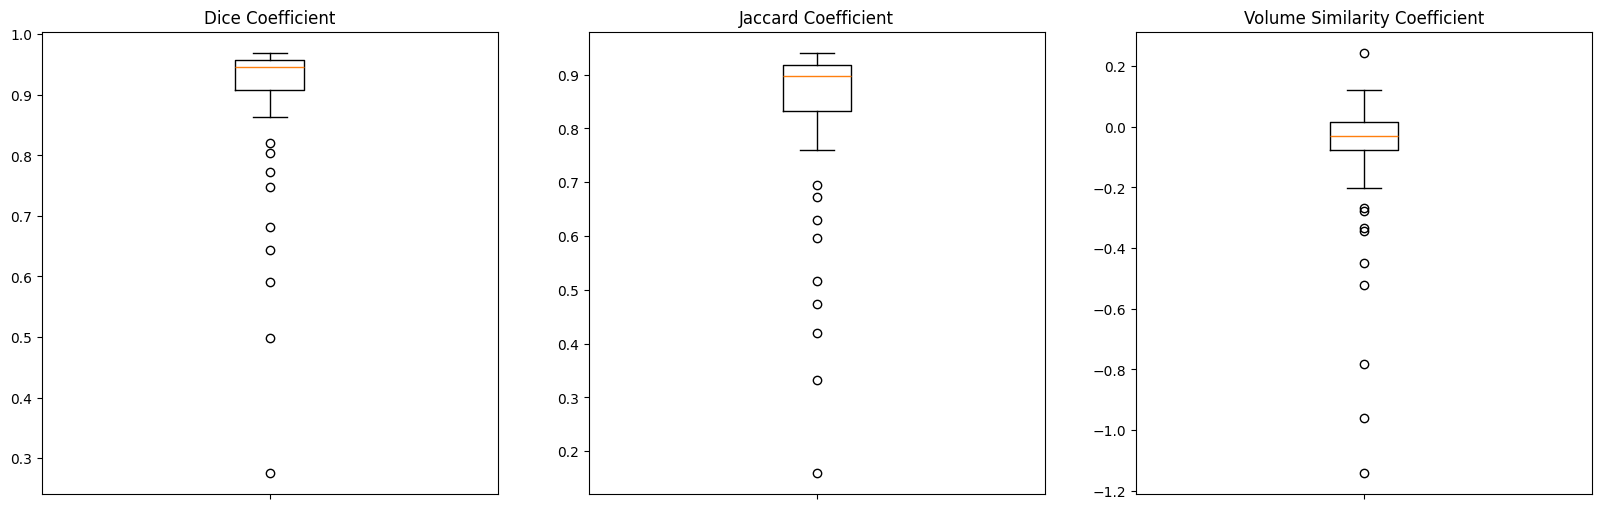

In [6]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes[0].boxplot(dice)
axes[0].title.set_text('Dice Coefficient')
axes[0].set_xticklabels([])

axes[1].boxplot(jaccard)
axes[1].title.set_text('Jaccard Coefficient')
axes[1].set_xticklabels([])

axes[2].boxplot(volume_similarity)
axes[2].title.set_text('Volume Similarity Coefficient')
axes[2].set_xticklabels([])

plt.show()


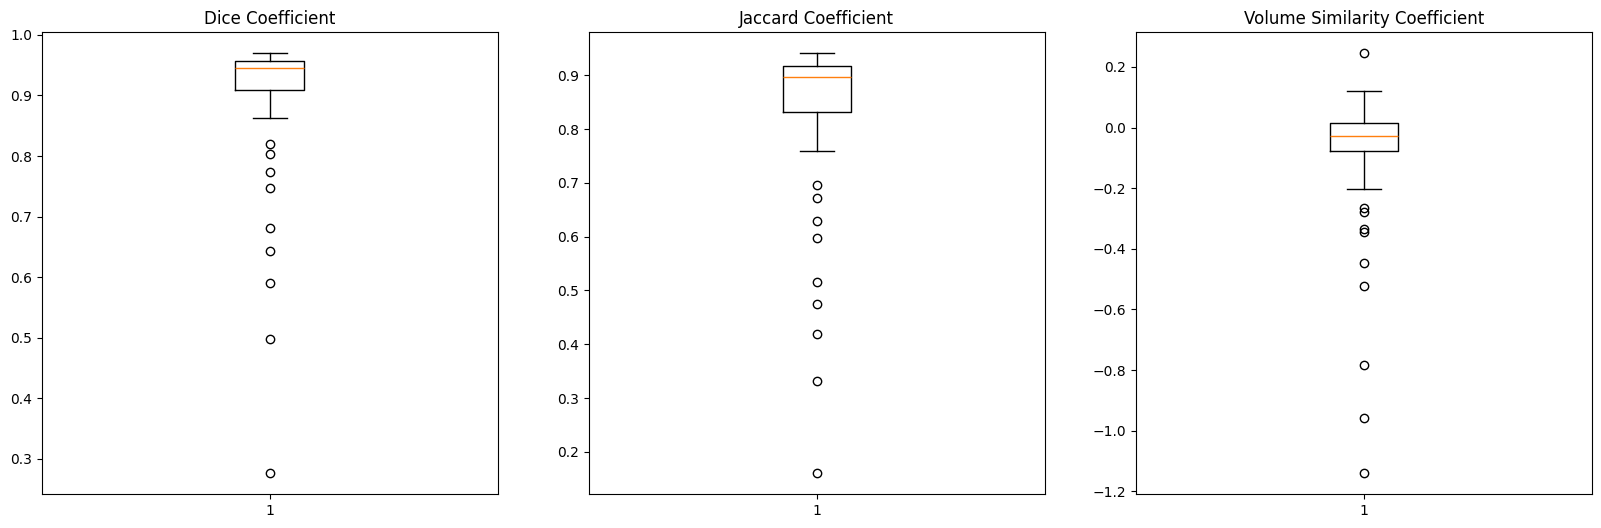

In [7]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes[0].boxplot(dice)
axes[0].title.set_text('Dice Coefficient')

axes[1].boxplot(jaccard)
axes[1].title.set_text('Jaccard Coefficient')

axes[2].boxplot(volume_similarity)
axes[2].title.set_text('Volume Similarity Coefficient')

plt.show()
